In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
def format_data(data):
    if (type(data) == str) :
        if (data == ' ') :
            return np.nan
        else :
            return np.float64(data)
    else :
        return data

In [3]:
def s_to_ns(x):
    return x/1.0e-9

In [4]:
data_in='./reference_waveforms/meas_VS_model_25u.csv'
data_out_model='FBK_FBKampl_modle_25um.csv'
data_out_meas='FBK_FBKampl_meas_25um.csv'
df = pd.read_csv(data_in)

In [5]:
df.columns

Index(['time (s)',
       '((VT("/model") - VDC("/model")) / ymax((VT("/model") - VDC("/model")))) (V)',
       '((VT("/FBK_UniGe") - VDC("/FBK_UniGe")) / ymax((VT("/FBK_UniGe") - VDC("/FBK_UniGe")))) (V)'],
      dtype='object')

In [6]:
len(df.columns)

3

In [7]:
df.columns[0]

'time (s)'

In [8]:
df.columns[1]

'((VT("/model") - VDC("/model")) / ymax((VT("/model") - VDC("/model")))) (V)'

In [9]:
df.columns[2]

'((VT("/FBK_UniGe") - VDC("/FBK_UniGe")) / ymax((VT("/FBK_UniGe") - VDC("/FBK_UniGe")))) (V)'

In [10]:
#df.rename(columns={'time (s)' :'time',
#                   '((VT("/model") - VDC("/model")) / ymax((VT("/model") - VDC("/model")))) (V)' :'model',
#                   '((VT("/FBK_UniGe") - VDC("/FBK_UniGe")) / ymax((VT("/FBK_UniGe") - VDC("/FBK_UniGe")))) (V)' : 'meas'},
#          inplace=True)

In [11]:
df.rename(columns={df.columns[0] :'time',
                   df.columns[1] :'meas',
                   df.columns[2] :'model'},
          inplace=True)

In [12]:
for x in df.columns :
     df[x]=df[x].map(format_data) 

In [13]:
df.describe()

time        meas         model
count  3.470000e+02  347.000000  3.470000e+02
mean   7.147821e-07    0.298134  2.677261e-01
std    9.879880e-07    0.407991  3.935346e-01
min    0.000000e+00   -0.003438 -4.925768e-13
25%    3.002343e-07   -0.000016  1.986669e-08
50%    3.035174e-07    0.013480  9.898457e-04
75%    6.877306e-07    0.660238  4.942618e-01
max    5.000000e-06    1.000000  1.000000e+00

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    347 non-null    float64
 1   meas    347 non-null    float64
 2   model   347 non-null    float64
dtypes: float64(3)
memory usage: 8.3 KB


In [15]:
df_model=df.copy(deep=True)
df_meas=df.copy(deep=True)

In [16]:
df_model=df_model[['time','model']]
df_meas=df_meas[['time','meas']]

In [17]:
df_model.set_index('time',inplace=True)
df_meas.set_index('time',inplace=True)

In [18]:
df_model.dropna(inplace=True)
df_meas.dropna(inplace=True)

In [19]:
df_model['time_ns']=df_model.index.map(s_to_ns)
df_meas['time_ns']=df_meas.index.map(s_to_ns)

In [20]:
df_model.set_index('time_ns',inplace=True)
df_meas.set_index('time_ns',inplace=True)

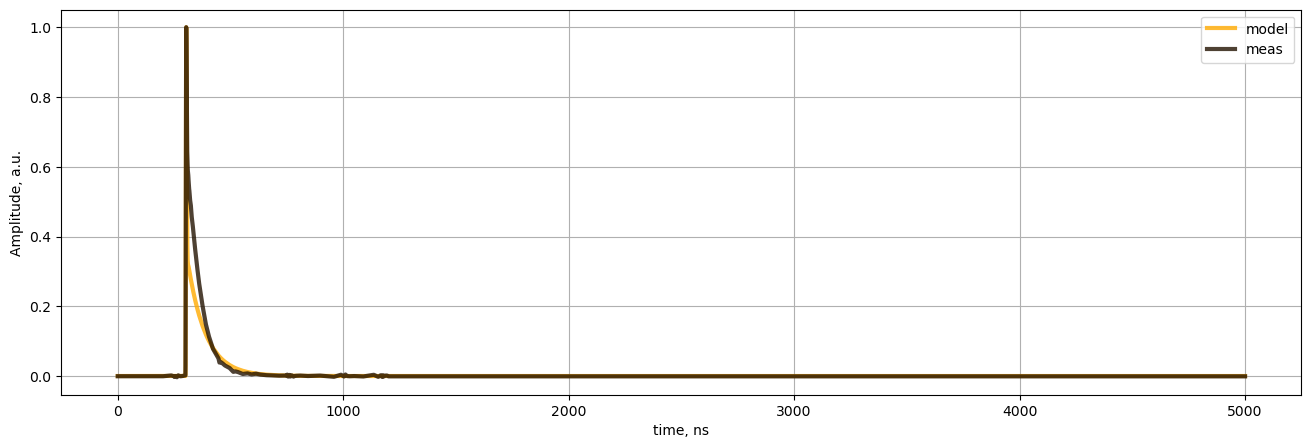

In [21]:
ax=df_model.plot( alpha=0.8, figsize=(16,5), c='#FFAA00',linewidth=3);
df_meas.plot(ax=ax, alpha=0.8,c='#221100',linewidth=3);
ax.set(xlabel='time, ns',ylabel='Amplitude, a.u.');
ax.yaxis.grid(True)
ax.xaxis.grid(True)

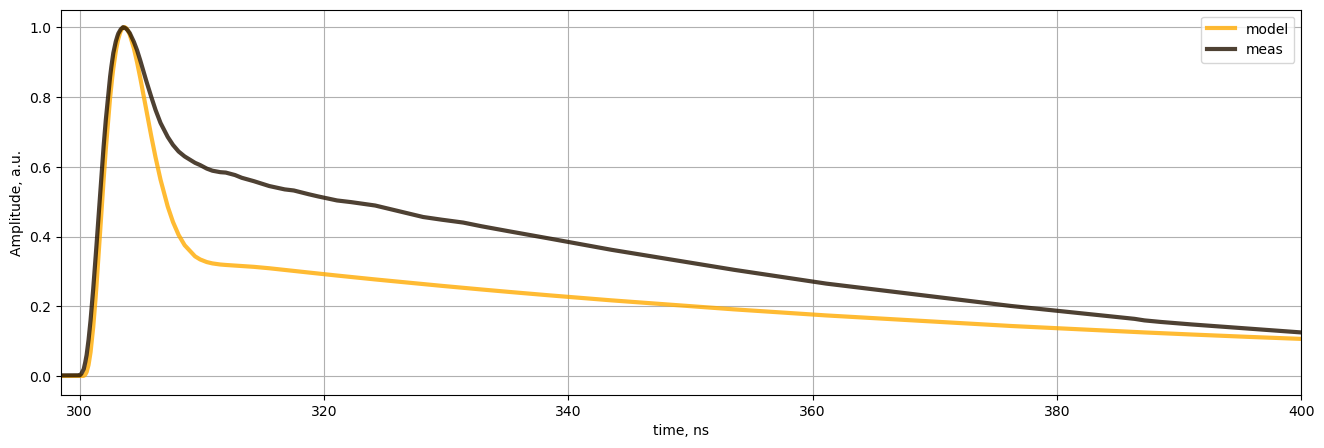

In [22]:
xlim=(298.5,400)
ax=df_model.plot( alpha=0.8, xlim=xlim,figsize=(16,5), c='#FFAA00',linewidth=3);
df_meas.plot(ax=ax, alpha=0.8,c='#221100',linewidth=3);
ax.set(xlabel='time, ns',ylabel='Amplitude, a.u.');
ax.yaxis.grid(True)
ax.xaxis.grid(True)


In [23]:
df_model.to_csv(str(data_out_model),sep=' ',header=False)
df_meas.to_csv(str(data_out_meas),sep=' ',header=False)